<a href="https://colab.research.google.com/github/nisha1365/Sanofi-POC/blob/main/AV_DataHour_Topic_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#   <font color='Brown'> Analytics Vidhya Data Hour | From Unstructured Data to Insights
    
#### <font color='Blue'> Session on Topic Modeling using LDA (Latent Dirchilet Allocation)

---


<span style='color:green'> - Arpendu Ganguly, Friday 21st October 2022 </span>

![](https://miro.medium.com/max/1100/1*8cspD8Tj7uPo1XJBw1Arbg.jpeg)

# <font color='Brown'> About Topic Modeling in Nut Shell

Topic Modeling is a technique to extract the hidden topics from large volumes of text. In Practically, it can be leveraged used for the
- Dimensionality Reduction
- Unsupervised Learning
- Tagging in context of Unstructued Text Data.
    
    
Topic Modelling is similar to dividing a bookstore based on the content of the books as it refers to the process of discovering themes in a text corpus and annotating the documents based on the identified topics.

When you need to segment, understand, and summarize a large collection of documents, topic modelling can be useful.


### Theoretical Overview about LDA
There are several existing algorithms you can use to perform the **Topic Modeling**. The most common of it are,
- Latent Semantic Analysis (LSA/LSI),
- Probabilistic Latent Semantic Analysis (pLSA)
- Latent Dirichlet Allocation (LDA)

LDA is a generative probabilistic model that assumes each topic is a mixture over an underlying set of words, and each document is a mixture of over a set of topic probabilities.

![LDA_Model](https://github.com/chdoig/pytexas2015-topic-modeling/blob/master/images/lda-4.png?raw=true)

We can describe the generative process of LDA as, given the M number of documents, N number of words, and prior K number of topics, the model trains to output:

- `psi`, the distribution of words for each topic K
- `phi`, the distribution of topics for each document i


### <font color='Brown'> I. Setting the Working Enviornment


In [ ]:
import pyLDAvis # package to interpret the topics in a topic model
import pyLDAvis.gensim_models # python library for the interactive topic modeling visualization
import pickle # for html export
import pandas as pd # for data processing
import os # for setting working directory
import re # regular expression library
from wordcloud import WordCloud # for generating word clouds
import gensim # open-source library for unsupervised topic modeling, document indexing
from gensim.utils import simple_preprocess
import nltk # python tool kit for NLP
nltk.download('stopwords')
from nltk.corpus import stopwords # for removing stop words
import gensim.corpora as corpora # for mapping words to integers
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\arpendu.ganguly\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### <font color='Brown'> II. Importing Data

In this session, we will be using the dataset of papers published in NeurIPS (NIPS) conference which is one of the most prestigious yearly events in the machine learning community. The CSV data file contains information on the different NeurIPS papers that were published from 1987 until 2016.

In [ ]:
# Master Folder Path
master_path = R"C:\Users\arpendu.ganguly\OneDrive - Accenture\2021_DELL_ALL_Backup\01_G_SELF\G_Analytics Vidhya Data Hour"
papers = pd.read_csv(os.path.join(master_path,"01_Input_Data",'papers.csv'))
print("The shape of data --->",papers.shape)
papers.head(10) # Print head

The shape of data ---> (6560, 7)


,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
5,1002,1994,Using a neural net to instantiate a deformable...,NaN,1002-using-a-neural-net-to-instantiate-a-defor...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
6,1003,1994,Plasticity-Mediated Competitive Learning,NaN,1003-plasticity-mediated-competitive-learning.pdf,Abstract Missing,Plasticity-Mediated Competitive Learning\n\nTe...
7,1004,1994,ICEG Morphology Classification using an Analog...,NaN,1004-iceg-morphology-classification-using-an-a...,Abstract Missing,ICEG Morphology Classification using an\nAnalo...
8,1005,1994,Real-Time Control of a Tokamak Plasma Using Ne...,NaN,1005-real-time-control-of-a-tokamak-plasma-usi...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...
9,1006,1994,Pulsestream Synapses with Non-Volatile Analogu...,NaN,1006-pulsestream-synapses-with-non-volatile-an...,Abstract Missing,Real-Time Control of a Tokamak Plasma\nUsing N...


###  <font color='Brown'> III. Inital Pre-Processing Data

Since the goal of this analysis is to perform topic modeling, let's focus only on the text data from each paper, and drop other metadata columns. Also, for the demonstration, we'll only look at 200 papers. For Pre-processing, we are performing:

- removing any punctuation
- lowercase conversion

In [ ]:
# Remove the columns
sample_text = 200
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(sample_text)

##### Remove punctuation/lower casing
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

1236    very loopy belief propagation for\nunwrapping ...
2106    sensory adaptation within a bayesian\nframewor...
2785    finding latent causes in causal networks:\nan ...
6413    non-intrusive gaze tracking using artificial\n...
670     an integrated vision sensor for the\ncomputati...
Name: paper_text_processed, dtype: object

###  <font color='Brown'> IV. Exploratory Data Analysis on the Text Data - WORD CLOUD Generation
To verify whether the preprocessing, we’ll make a simple word cloud using the `wordcloud` package to get a visual representation of most common words. It is key to understanding the data and ensuring we are on the right track, and if any more preprocessing is necessary before training the model.

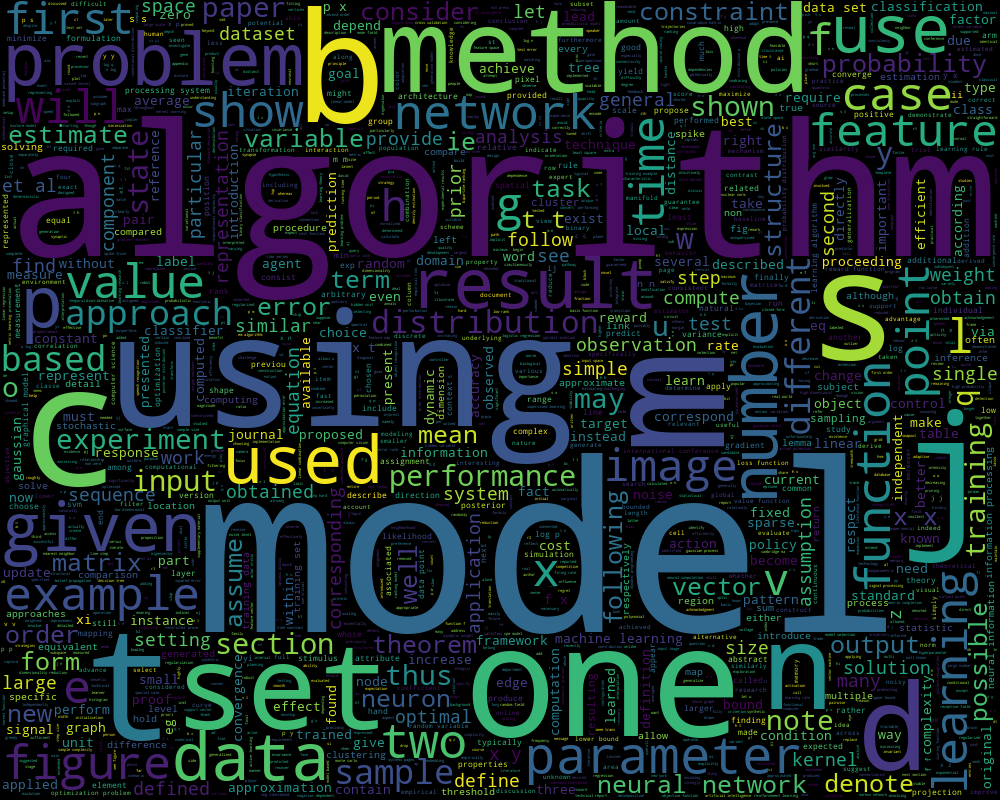

In [ ]:
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000, contour_width=3, contour_color='steelblue',width=1000,height=800)

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

### <font color='Brown'> V. Initating the LDA Analysis
Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [ ]:
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'used','using','use','model','one','two','set'])
"""
    Functions for converting sentence to words
"""
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
"""
    Functions removing the stopwords
"""
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc))
             if word not in stop_words] for doc in texts]

data = papers.paper_text_processed.values.tolist()#creating the array of token
data_words = list(sent_to_words(data))#converting them into list

data_words = remove_stopwords(data_words)# remove stop words
print(data_words[:1][0][:30])

['wasserstein', 'training', 'restricted', 'boltzmann', 'machines', 'grgoire', 'montavon', 'technische', 'universitt', 'berlin', 'klaus', 'robert', 'mller', 'technische', 'universitt', 'berlin', 'tu', 'berlinde', 'klaus', 'robertmueller', 'tu', 'berlinde', 'marco', 'cuturi', 'crest', 'ensae', 'universit', 'paris', 'saclay', 'marcocuturi']


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Printing the corpus in a numeric form which implies the frequency of the word
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 2), (8, 1), (9, 1), (10, 1), (11, 1), (12, 2), (13, 1), (14, 1), (15, 1), (16, 1), (17, 3), (18, 1), (19, 2), (20, 1), (21, 2), (22, 1), (23, 1), (24, 4), (25, 1), (26, 8), (27, 3), (28, 1), (29, 1)]


In [ ]:
#Showing the code
id2word

###  <font color='Brown'> VI. LDA model tranining
Next, let’s work to transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [ ]:
from pprint import pprint
# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.007*"model" + 0.005*"learning" + 0.004*"set" + 0.004*"time" + '
  '0.004*"algorithm" + 0.004*"results" + 0.004*"data" + 0.004*"one" + '
  '0.004*"training" + 0.003*"models"'),
 (1,
  '0.006*"model" + 0.005*"algorithm" + 0.005*"learning" + 0.004*"number" + '
  '0.004*"set" + 0.004*"time" + 0.003*"data" + 0.003*"matrix" + '
  '0.003*"training" + 0.003*"function"'),
 (2,
  '0.006*"data" + 0.006*"learning" + 0.005*"model" + 0.005*"algorithm" + '
  '0.005*"using" + 0.005*"set" + 0.004*"one" + 0.004*"time" + 0.004*"function" '
  '+ 0.004*"figure"'),
 (3,
  '0.005*"learning" + 0.005*"algorithm" + 0.005*"model" + 0.004*"set" + '
  '0.004*"function" + 0.004*"one" + 0.004*"using" + 0.003*"time" + '
  '0.003*"used" + 0.003*"number"'),
 (4,
  '0.006*"algorithm" + 0.005*"data" + 0.005*"set" + 0.004*"function" + '
  '0.004*"learning" + 0.004*"model" + 0.004*"number" + 0.004*"problem" + '
  '0.004*"one" + 0.003*"two"'),
 (5,
  '0.007*"model" + 0.006*"data" + 0.005*"set" + 0.005*"using" + '


###  <font color='Brown'> VII. Analysing the LDA Model

Now that we have a trained model let’s visualize the topics for interpretability. To do so, we’ll use a popular visualization package, pyLDAvis which is designed to help interactively with:

1. Better understanding and interpreting individual topics, and
2. Better understanding the relationships between the topics.

For (1), you can manually select each topic to view its top most frequent and/or “relevant” terms, using different values of the λ parameter. This can help when you’re trying to assign a human interpretable name or “meaning” to each topic.

For (2), exploring the Intertopic Distance Plot can help you learn about how topics relate to each other, including potential higher-level structure between groups of topics.o transform the textual data in a format that will serve as an input for training LDA model. We start by tokenizing the text and removing stopwords. Next, we convert the tokenized object into a corpus and dictionary.

In [ ]:
# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(master_path,'02_Results','ldavis_prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared,'ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
6     -0.003309 -0.004057       1        1  19.066255
2     -0.002922  0.004026       2        1  14.062641
4     -0.008733 -0.004833       3        1  11.129139
5      0.004736 -0.001188       4        1  10.569574
7     -0.002621  0.001900       5        1   9.292638
9     -0.000048  0.003127       6        1   9.164467
0      0.009509 -0.002893       7        1   7.795543
8      0.002449 -0.001564       8        1   7.625683
3      0.001759  0.001057       9        1   5.686974
1     -0.000818  0.004424      10        1   5.607085, topic_info=              Term         Freq        Total Category  logprob  loglift
578          model  2547.000000  2547.000000  Default  30.0000  30.0000
939       training  1317.000000  1317.000000  Default  29.0000  29.0000
615         number  1410.000000  1410.000000  Default  28.0000  28.0000
24       algorithm  2036.000000  2036.000000  Default  27.0000  27.0000
930           time  1533.000000  1533.000000  Default  26.0000  26.0000
...            ...          ...          ...      ...      ...      ...
705        problem    59.086790  1342.118896  Topic10  -6.0626  -0.2419
580         models    55.851465  1157.682620  Topic10  -6.1189  -0.1503
263   distribution    51.643057   918.156263  Topic10  -6.1972   0.0031
517         linear    50.813875   962.604905  Topic10  -6.2134  -0.0603
1287       network    50.564400  1167.485081  Topic10  -6.2183  -0.2582

[889 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
3078      1  0.199209  accuracy
3078      2  0.110089  accuracy
3078      3  0.102226  accuracy
3078      4  0.128438  accuracy
3078      5  0.096984  accuracy
...     ...       ...       ...
6814      3  0.135458       zlw
6814      4  0.135458       zlw
6814      5  0.270915       zlw
6814      6  0.135458       zlw
6814      8  0.135458       zlw

[4193 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[7, 3, 5, 6, 8, 10, 1, 9, 4, 2])

## Next Steps:

1. Improving the Input Matrix which goes into the Model by using Natural Processing Functions like Lemmatization, Stemming and Pharse Modeling (using bi-gram or tri-gram features)
2. Iterating on different Number of topics to view the quality of topics being created
3. Using Model Perplexity & Coherence Score to decide on the optimal no. of Topics
4. Hyperparamter Tuning of the Model Parameters

In [ ]:
#END OF THE CODE.